In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

data_vino = 'C:\\Users\\PC\\csv_docs\\wines_SPA.csv'  # Ruta del archivo con el csv sobre el vino

data = pd.read_csv(data_vino)


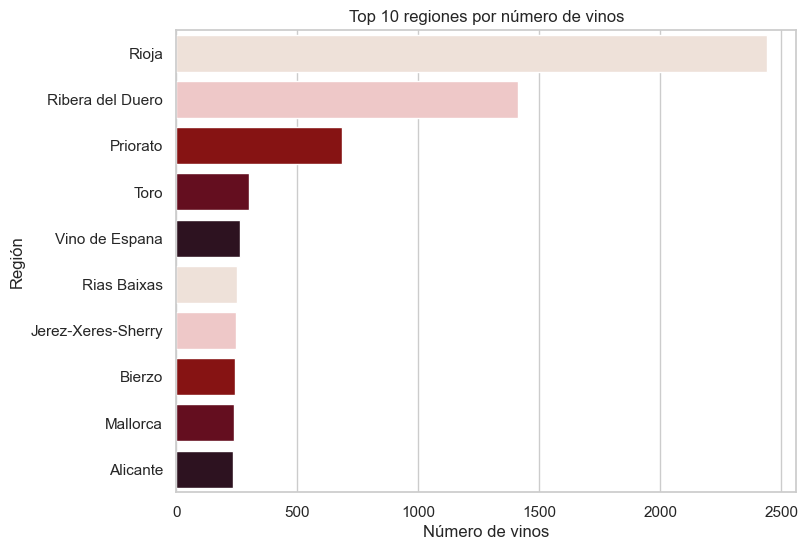

In [2]:
# Comenzamos con un grafico de barras sencillo que muestra top 10 regiones con más vino.
# Como es de esperar Rioja y Ribera del duero estan en cabeza lideres de ventas y más famosos internacionalmente.

sns.set(style="whitegrid")

# Defino una paleta de colores de vino para meterme mas en la tematica seleccionada
wine_colors = ["#f1e0d6", "#f4c2c2", "#990000", "#720017", "#310d20"]  
# Tonos desde vino blanco a tinto oscuro gran contraste

plt.figure(figsize=(8, 6))
region_count = data['region'].value_counts().head(10)  # Top 10 regiones con más vinos
sns.barplot(x=region_count.values, y=region_count.index, palette=wine_colors)
plt.title('Top 10 regiones por número de vinos')
plt.xlabel('Número de vinos')
plt.ylabel('Región')

plt.show()


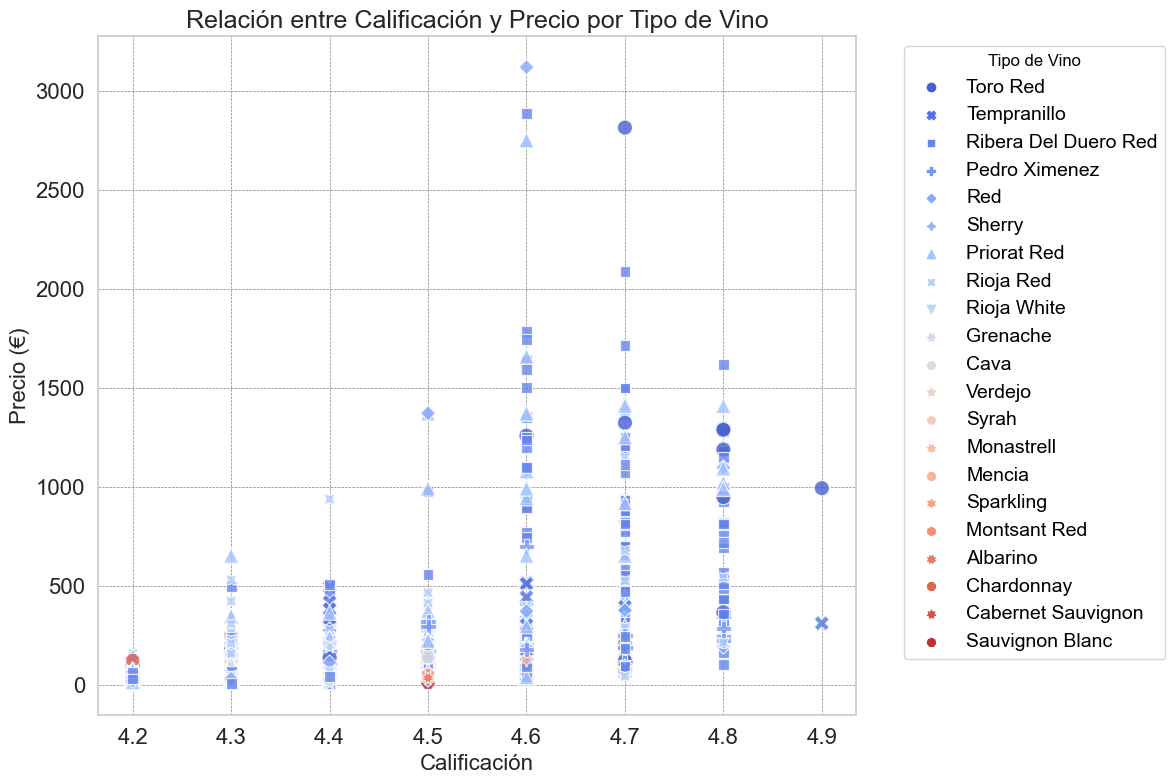

In [3]:
# Gráfico de dispersión muestra la relación entre (calificación y precio) de vinos VS (tipos).
# Nos da una visión concisa de cómo varían precio y calificación por tipo de vino, 

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.scatterplot(x='rating', y='price', data=data, hue='type', style='type', alpha=0.8, s=120,palette="coolwarm")
plt.title('Relación entre Calificación y Precio por Tipo de Vino', fontsize=18)
plt.xlabel('Calificación', fontsize=16)
plt.ylabel('Precio (€)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
legend = plt.legend(title='Tipo de Vino', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.setp(legend.get_texts(), color='black')
plt.setp(legend.get_title(), color='black')
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.tight_layout()

plt.show()

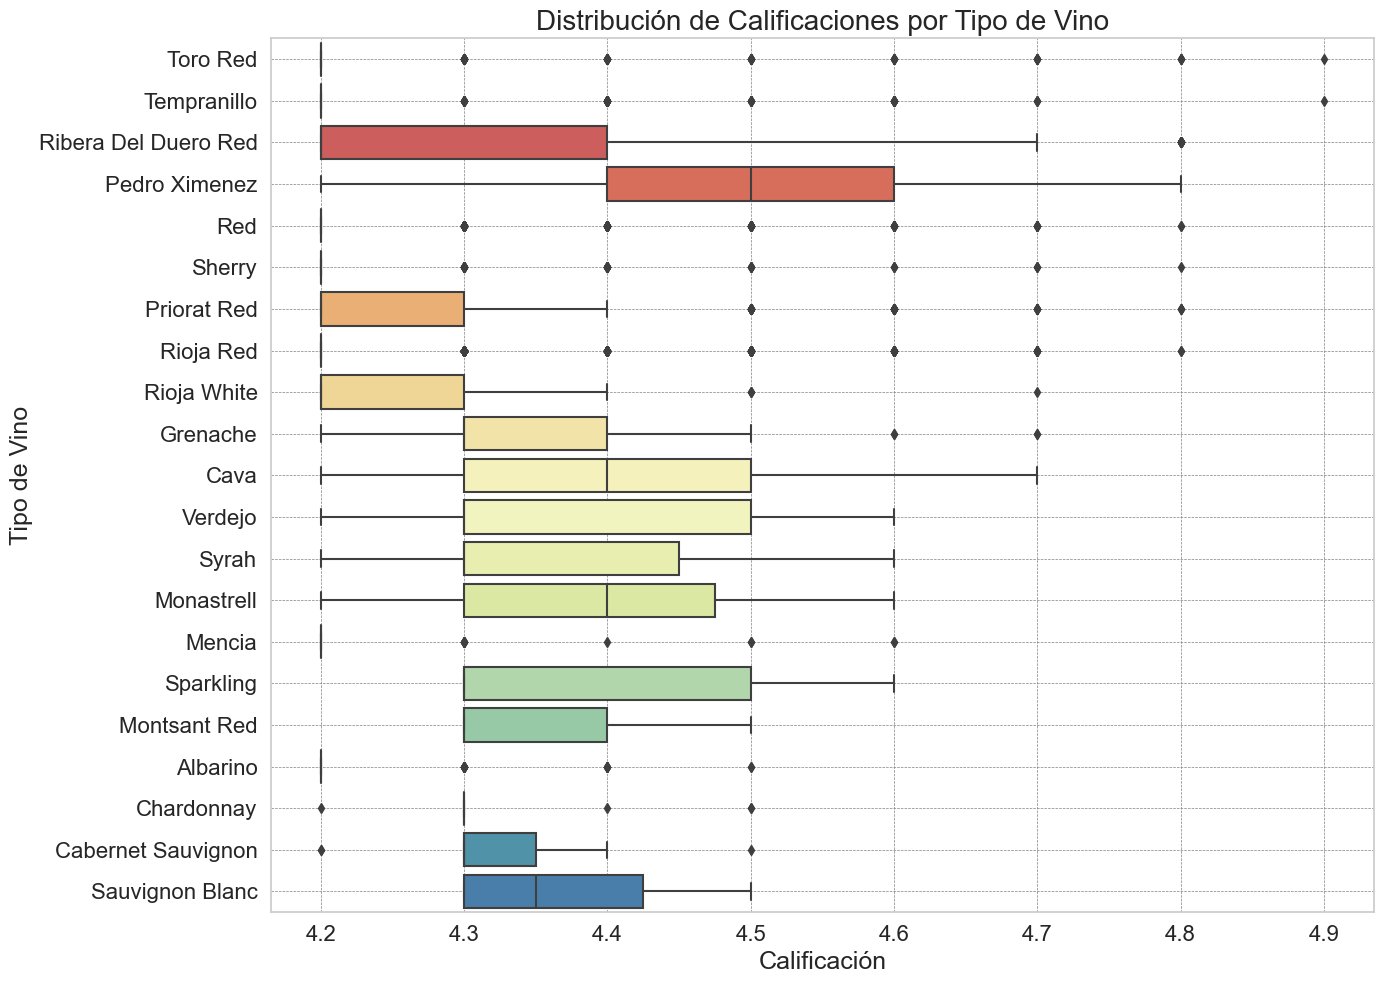

In [14]:
# El gráfico muestra boxplots de calificaciones de vinos por tipo.
# Uso colores para diferenciarlos y resaltar su distribución y variabilidad.

plt.figure(figsize=(14, 10))  
sns.set(style="whitegrid")
wine_rating_palette = sns.color_palette("Spectral", n_colors=len(data['type'].unique()))
sns.boxplot(x='rating', y='type', data=data, palette=wine_rating_palette)
plt.title('Distribución de Calificaciones por Tipo de Vino', fontsize=20)
plt.xlabel('Calificación', fontsize=18)
plt.ylabel('Tipo de Vino', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.tight_layout()

plt.show()

In [12]:
# Este gráfico de violín se ve la distribución de calificaciones por tipo de vino, usando colores distintivos para cada uno. 
# Combina box plots y densidades de probabilidad para mostrar tanto la dispersión como la densidad de las calificaciones. 
# Cada violín tiene una caja interna que destaca la mediana, cuartiles y valores atípicos, con una línea de media para la calificación promedio. 
# Los puntos representan calificaciones individuales, facilitando visualizar la distribución de los datos. 

fig = px.violin(data, y='rating', x='type',
                color='type',  
                box=True,  
                points="all",  
                hover_data=data.columns,  
                color_discrete_sequence=['#641E16', '#7B241C', '#922B21', '#A93226', '#C0392B', '#D98880', '#F2D7D5'])

fig.update_layout(title_text='Distribución de Calificaciones por Tipo de Vino',
                  violingap=0.1,  
                  violingroupgap=0,  
                  violinmode='overlay',  
                  template='plotly_white',  
                  title_font=dict(size=22, color='#333'),  
                  font=dict(family="Arial, sans-serif", 
                            size=12,
                            color="black"))


fig.update_traces(box_visible=True,
                  meanline_visible=True,
                  fillcolor='lightgrey',
                  opacity=0.6,
                  line_color='black')


fig.show()

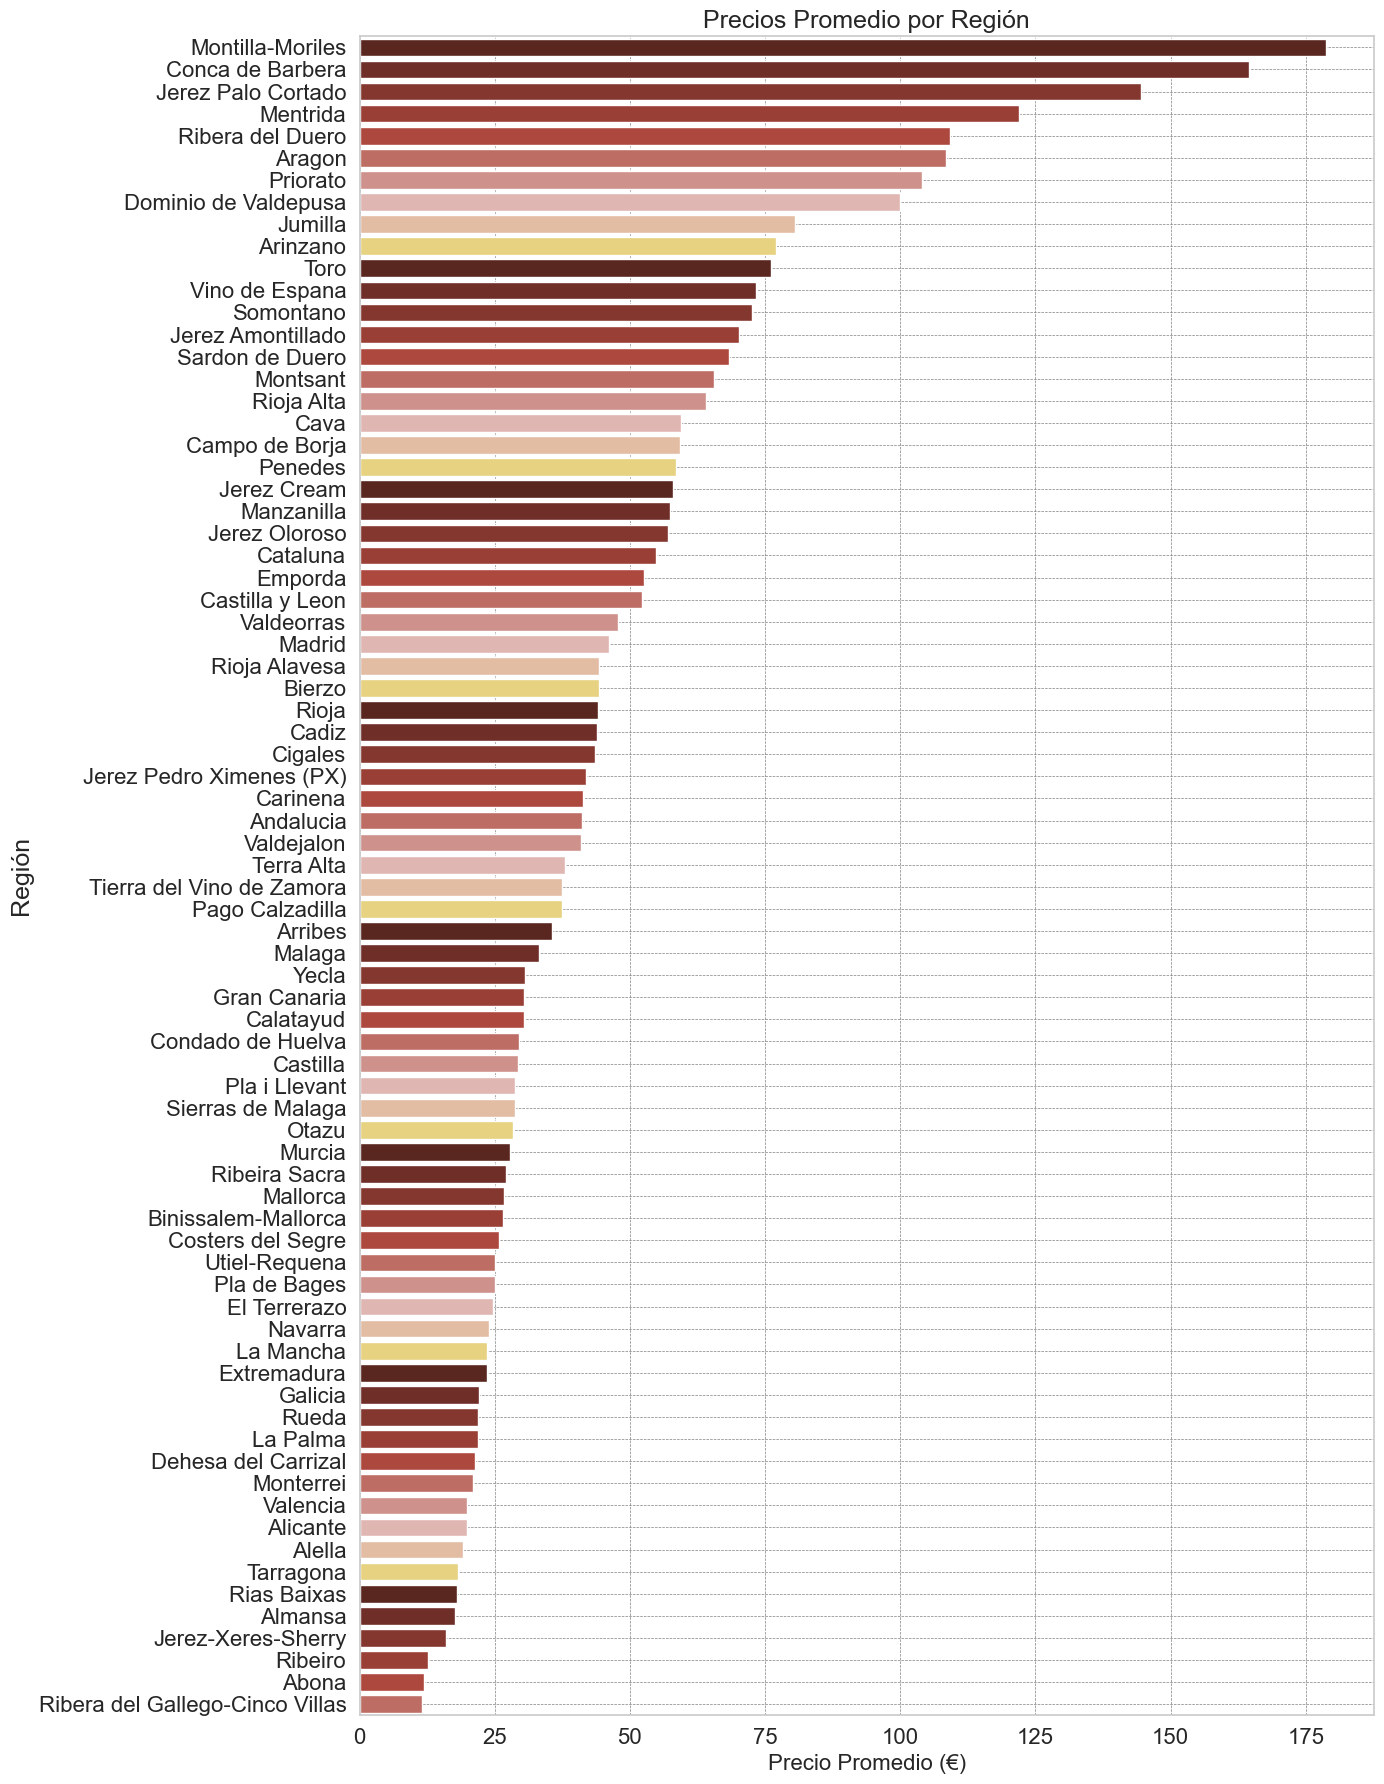

In [15]:
# Este gráfico de barras muestra los precios promedio de vino por región.
# Ordenados de mayor a menor.
# Utiliza una paleta de colores inspirada en el vino para mejorar la visualización. 
# Destaco las diferencias en el precio promedio de los vinos entre regiones.

average_price_per_region = data.groupby('region')['price'].mean().reset_index().sort_values(by='price', ascending=False)
plt.figure(figsize=(14, 18))  
wine_color_palette = ["#641E16", "#7B241C", "#922B21", "#A93226", "#C0392B", "#CD6155", "#D98880", "#E6B0AA", "#EDBB99", "#F7DC6F"]
sns.barplot(x='price', y='region', data=average_price_per_region, palette=wine_color_palette)
plt.title('Precios Promedio por Región', fontsize=18)
plt.xlabel('Precio Promedio (€)', fontsize=16)
plt.ylabel('Región', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16, rotation=0)  
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.tight_layout()

plt.show()


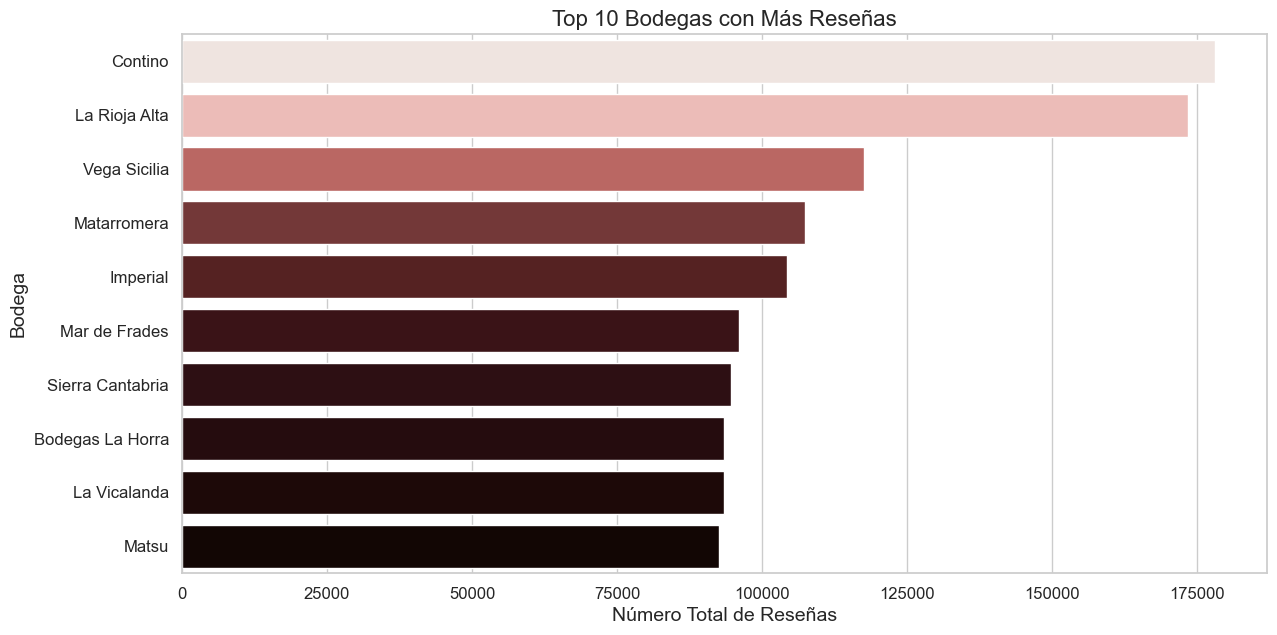

In [16]:
# A continuación se observa las 10 bodegas con más reseñas dandoles un color simulando cata de vino.
# Como podemos observar se trata de vinos muy reconocibles y comerciales.

winery_reviews = data.groupby('winery')['num_reviews'].sum().reset_index()
top_wineries = winery_reviews.sort_values('num_reviews', ascending=False).head(10)
wine_colors = ["#f1e3dd", "#f4b5b0", "#c85a54", "#7d2e2e", "#5e1919", "#400D12", "#320A0F", "#29080B", "#200605", "#140402"]
plt.figure(figsize=(14, 7))
sns.barplot(x='num_reviews', y='winery', data=top_wineries, palette=wine_colors)
plt.title('Top 10 Bodegas con Más Reseñas', fontsize=16)
plt.xlabel('Número Total de Reseñas', fontsize=14)
plt.ylabel('Bodega', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [6]:
# Gráfico interactivo muestra los 10 vinos más caros 
# Precios y colores por valor. Me parecio curioso indagar dar un paso más.
# Seleccionamos top 10

top10_expensive_wines = data.nlargest(10, 'price')

# Creo el gráfico de barras interactivo con Plotly, ajustando colores a tonos tintos. 

fig = px.bar(top10_expensive_wines, 
             x='price', 
             y='wine', 
             text='price', 
             orientation='h', 
             title='Top 10 Vinos Más Caros',
             labels={'price': 'Precio (€)', 'wine': 'Vino'},
             color='price',
             color_continuous_scale=px.colors.sequential.Burg) 

fig.update_layout(xaxis_title='Precio (€)',
                  yaxis_title='Vino',
                  yaxis={'categoryorder': 'total ascending'},
                  coloraxis_colorbar=dict(title="Precio (€)"))

fig.show()

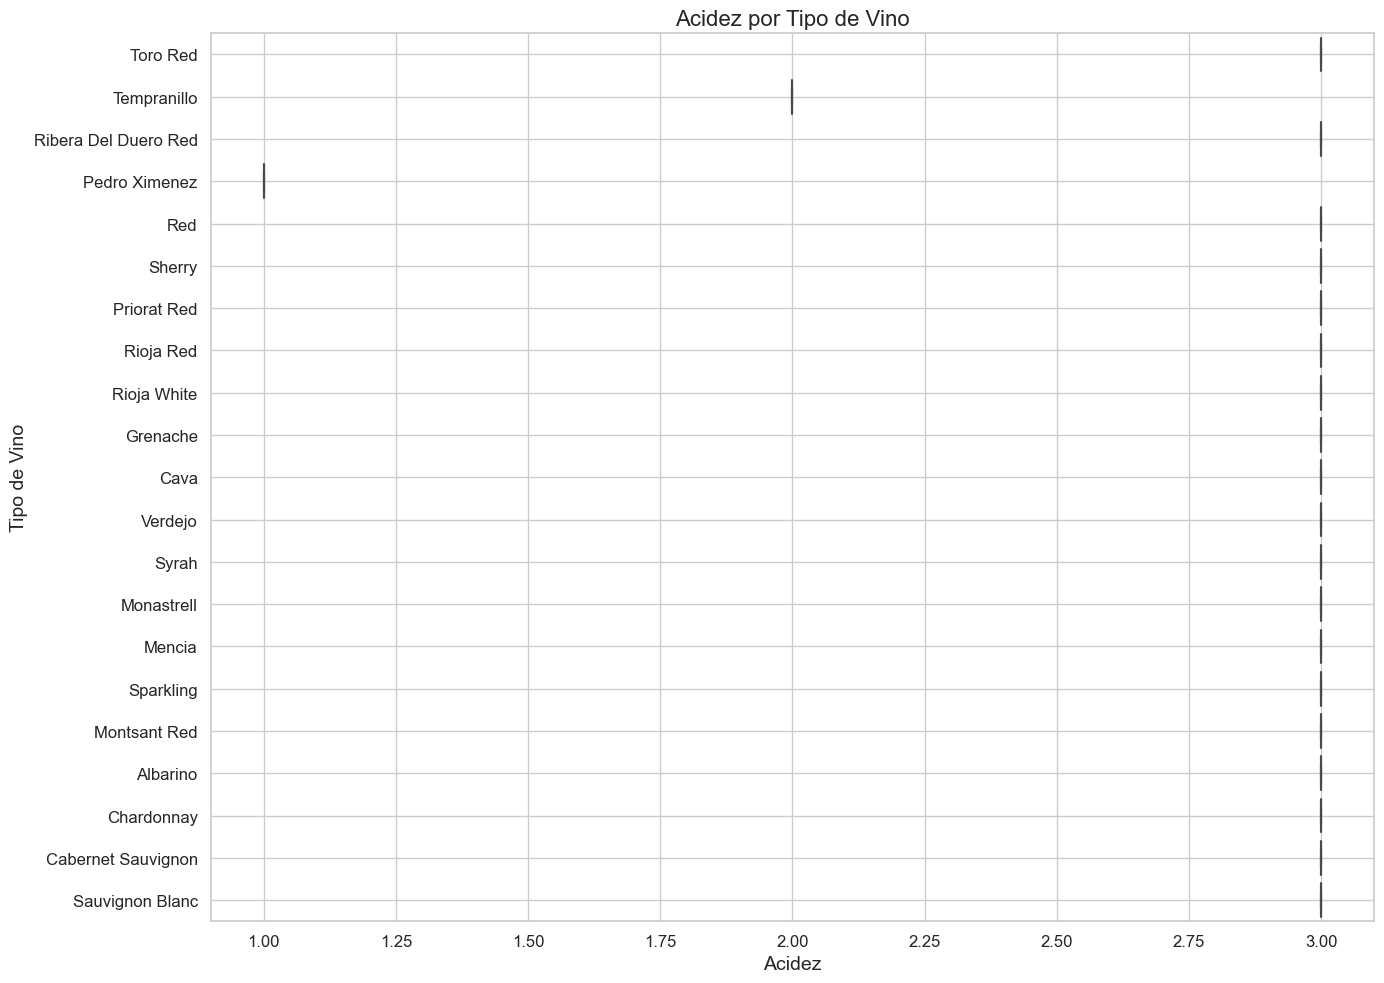

In [11]:
# Diagrama de cajas de la Acidez por Tipo de Vino con Seaborn. 
# Compara acidez entre tipos de vino.

plt.figure(figsize=(14, 10))
sns.boxplot(x='acidity', y='type', data=data, palette="coolwarm")
plt.title('Acidez por Tipo de Vino', fontsize=16)
plt.xlabel('Acidez', fontsize=14)
plt.ylabel('Tipo de Vino', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True) 
plt.tight_layout() 

plt.show()

In [8]:
# Este gráfico 3D interactivo muestra la relación entre el cuerpo y la acidez de los vinos a lo largo de los años.
# Con colores que diferencian los tipos de vino siguiendo la linea de todo el trabajo de tonos color vino tinto.
# Podemos explorar visualmente cómo estas características cambian entre diferentes vinos y cómo han evolucionado con el tiempo.
# Nos permite finalizar con perspectiva única sobre la diversidad y la evolución de los vinos.

wine_colors = ['#30011E', '#5E2129', '#8B2F41', '#A64155', '#C67F83', '#E2BCB7', '#F2D7D5']
fig = px.scatter_3d(data, x='body', y='acidity', z='year',
                    color='type',
                    hover_name='wine',  
                    hover_data=['winery', 'region'],  
                    title='Relación 3D entre Cuerpo, Acidez y Año por Tipo de Vino',
                    color_discrete_sequence=wine_colors,  
                    template='plotly_dark')  

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30),
                  scene=dict(
                      xaxis_title='Cuerpo',
                      yaxis_title='Acidez',
                      zaxis_title='Año',
                      xaxis=dict(showspikes=False),
                      yaxis=dict(showspikes=False),
                      zaxis=dict(showspikes=False)),
                  scene_camera=dict(eye=dict(x=1.25, y=1.25, z=1.25)))  

fig.show()


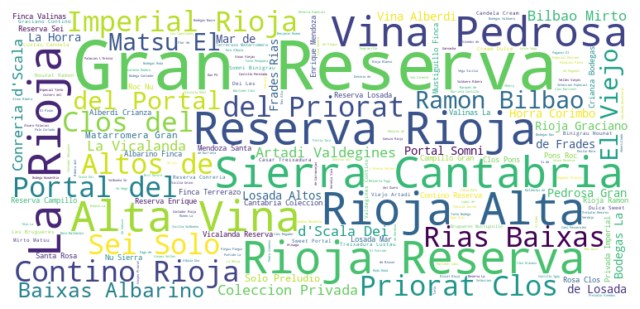

In [13]:
# Nube de palabras con las bodegas y vinos más frecuentes de mayor a menor.
# Me parecio interesante terminar los graficos con una nube representativa.
# Muy sencilla interpretacion cuanto mas grande son las letras mas peso tienen en el conjunto de datos csv proporcionado.

data_vino = pd.read_csv('C:\\Users\\PC\\csv_docs\\wines_SPA.csv')
from wordcloud import WordCloud

text = ' '.join(data['winery'] + ' ' + data['wine'])
wordcloud = WordCloud(width=750, height=350, background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()
